In [629]:
! pip install imblearn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [117]:
import pandas as pd
import numpy as np 
import warnings
import matplotlib
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# plt.rc('font',family = 'NanumGothic')
plt.rc('font',family = 'Malgun Gothic')
matplotlib.rc("axes",unicode_minus = False) # 음수표시 


#스케일
from sklearn.preprocessing import StandardScaler

#분류 SVM
from sklearn.svm import SVC

#로지스틱
from statsmodels.api import Logit

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [19]:
df_raw = pd.read_csv("SCALE불량.csv",encoding='euc-kr')

In [20]:
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


# 1. 데이터 분석, 전처리

- 결측치 확인
- 필요없는 데이터 분리 및 목표변수/설명변수 분리
- 이상치 제거
- 파생변수

### 결측치 확인

In [21]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [23]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
pt_thick,1000.0,26.782,18.137570,12.0,15.00,19.0,34.00,100.0
pt_width,1000.0,2831.900,494.081478,1800.0,2500.00,2800.0,3100.00,4600.0
pt_length,1000.0,36788.200,13912.387116,7900.0,26650.00,40400.0,49100.00,54900.0
fur_heat_temp,1000.0,1157.245,21.245007,1103.0,1140.00,1159.0,1173.00,1206.0
fur_heat_time,1000.0,85.972,26.346297,55.0,66.00,75.0,102.25,158.0
fur_soak_temp,1000.0,1150.928,17.344384,1113.0,1135.75,1156.0,1164.00,1185.0
fur_soak_time,1000.0,71.720,20.602137,35.0,57.75,66.0,81.00,145.0
fur_total_time,1000.0,238.589,38.194828,165.0,210.00,230.0,263.00,362.0
fur_ex_temp,1000.0,1150.928,17.344384,1113.0,1135.75,1156.0,1164.00,1185.0
rolling_temp,1000.0,934.637,96.598015,0.0,893.75,948.0,991.00,1078.0


### 요약 통계량 확인 결과, 압연온도 최소값이 0인것은 이상치일 확률이 높다.

## 연속형 변수 정리 및 이상치 처리

In [24]:
df_raw.columns

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'fur_ex_temp', 'rolling_method',
       'rolling_temp', 'descaling_count', 'work_group'],
      dtype='object')

- plate_no: 단순한 번호이므로 제외
- rolling_date: 공장이므로 동일한 환경에서 진행된 것이기 때문에 날짜와 상관없으므로 제외
- scale: 목표변수: 불량/양품
- spec_long: 범주
- spec_country: 나라마다 불량율이 다를 수 있으므로 확이
- steel_kind: 범주
- pt_thick  spec_long에 맞게 판단
- pt_width  spec_long에 맞게 판단
- pt_length  계산
- hsb:  범주
- fur_no: 범주
- 'fur_input_row': 범주
- 'fur_heat_temp': IQR
- 'fur_heat_time': IQR
- 'fur_soak_temp': IQR
- 'fur_soak_time': IQR
- 'fur_total_time' :IQR, 파생변수 생성
- 'fur_ex_temp' : IQR
- 'rolling_method' : 범주
- 'rolling_temp' : IQR
- 'descaling_count' : IQR
- 'work_group': 범주

## spec_long 이상치 판단
- spec에 따라 PT_THICK, PT_WIDTH, PT_LENGTH이 달라지므로 계산후 판단.

## pt_thick, pt_width, pt_length

- AB/EH36-TM의 두께는 5~ 150mm
- AB/EH36-TM의 넓이는 1000~ 3500mm, 일부업체에서는 더 큰 넓이도 가능
- AB/EH36-TM의 길이는 6000~24000mm,
<br><br>
- PILAC-BT33의 두께는 6~ 100mm
- PILAC-BT33의 넓이는 2000~ 4000mm, 일부업체에서는 더 큰 넓이도 가능
- PILAC-BT33의 길이는 6000~12000mm
<br><br>
- JS-SM400A의 두께는 1.6~ 100mm
- JS-SM400A의 넓이는 1000~ 3000mm, 일부업체에서는 더 큰 넓이도 가능
- JS-SM400A의 길이는 2000~12000mm
<br><br>
-> 두께, 길이, 넓이가 클수록 운반 빛 가공과정에서 더 큰 어려움과 비용이 발생하므로 불량율이 올라감
-> 두께가 클수록 충분한 강도와 내구성을 제공하기 위해 길이와 넓이가 커야함.

1. 표준규격에 맞게 이상치 검사를 실시
2. 이상치에 대해서는 두께는 100mm이하, 넓이는 4000mm이하, 길이는 이상치 판단으로 결정 

<AxesSubplot:>

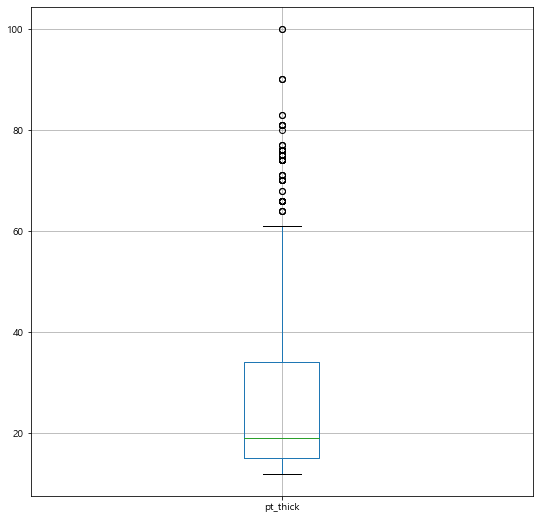

In [25]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['pt_thick'])

<AxesSubplot:>

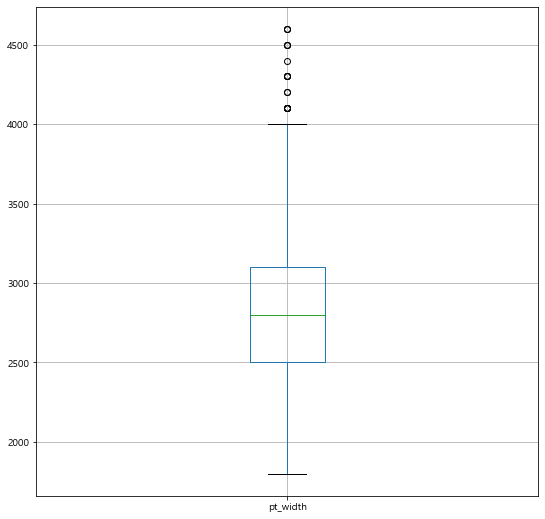

In [26]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['pt_width'])

In [27]:
# 이상치에 해당하는 값을 조사
display(df_raw[df_raw['pt_width']>4000])

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
412,PLT_1413,06JAN2023:04:37:33,양품,BV-A,프랑스,C,12,4300,41600,적용,...,1169,70,1169,43,216,1169,CR(제어압연),900,10,2조
413,PLT_1414,06JAN2023:04:48:40,양품,NV-A,영국,C,12,4300,41600,적용,...,1169,70,1169,43,209,1169,CR(제어압연),900,10,2조
414,PLT_1415,06JAN2023:04:55:01,양품,NV-A,영국,C,14,4300,50800,적용,...,1144,71,1156,56,192,1156,CR(제어압연),892,10,2조
415,PLT_1416,06JAN2023:05:04:05,양품,NV-A,영국,C,14,4200,50600,적용,...,1150,72,1159,55,197,1159,CR(제어압연),909,10,2조
416,PLT_1417,06JAN2023:05:14:28,양품,BV-AH32,프랑스,C,16,4600,24100,적용,...,1174,71,1167,58,190,1167,CR(제어압연),933,10,2조
417,PLT_1418,06JAN2023:05:20:53,불량,AB/B,미국,C,18,4300,24400,적용,...,1191,78,1179,50,185,1179,CR(제어압연),966,10,2조
418,PLT_1419,06JAN2023:05:26:01,양품,LR-A,영국,C,18,4400,28600,적용,...,1149,67,1156,64,216,1156,CR(제어압연),954,10,2조
419,PLT_1420,06JAN2023:05:32:53,불량,LR-AH32,영국,C,20,4500,20700,적용,...,1154,77,1160,50,182,1160,CR(제어압연),961,7,2조
420,PLT_1421,06JAN2023:05:40:28,양품,LR-AH32,영국,C,20,4500,20700,적용,...,1163,82,1160,53,191,1160,CR(제어압연),959,8,2조
421,PLT_1422,06JAN2023:05:47:51,양품,LR-A,영국,C,21,4100,30200,적용,...,1139,64,1158,64,203,1158,CR(제어압연),966,8,2조


In [28]:
df_raw = df_raw[df_raw['pt_width']<=4000]
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


<AxesSubplot:>

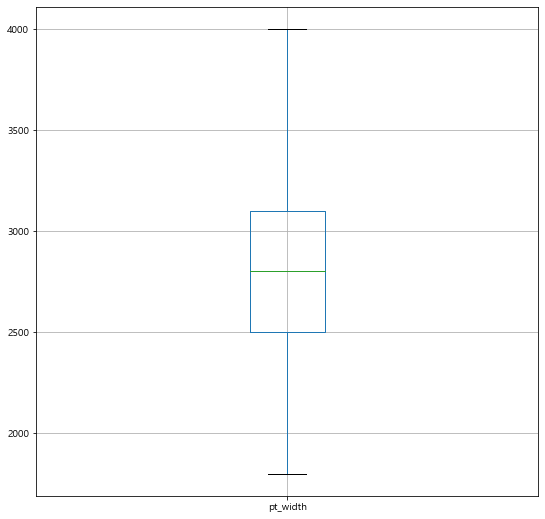

In [29]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['pt_width'])

<AxesSubplot:>

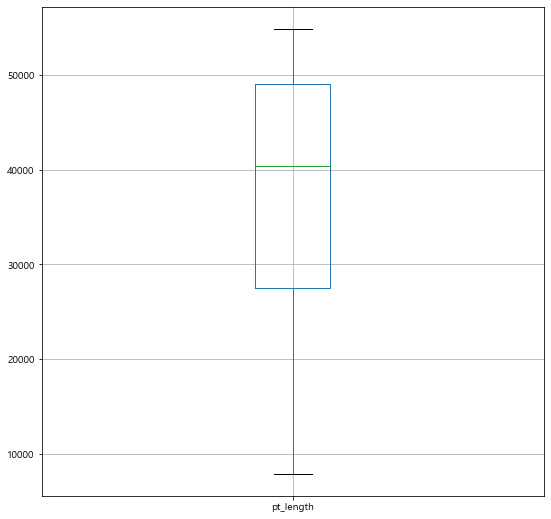

In [30]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['pt_length'])

'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time'

## 가열 온도, 시간 확인

<AxesSubplot:>

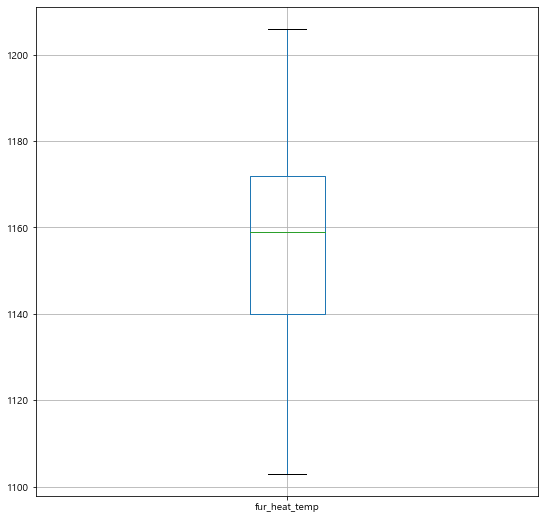

In [31]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['fur_heat_temp'])

<AxesSubplot:>

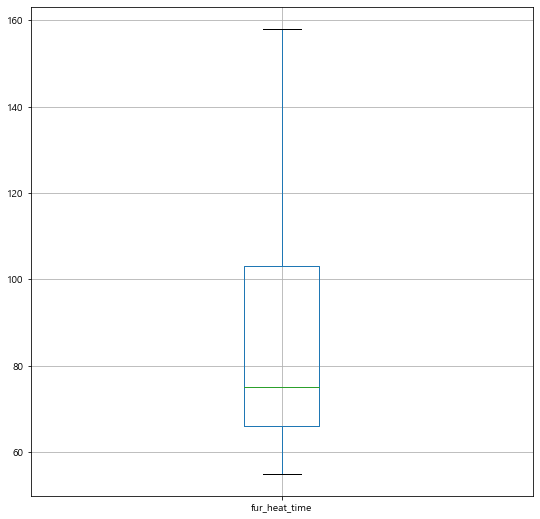

In [32]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['fur_heat_time'])

<AxesSubplot:>

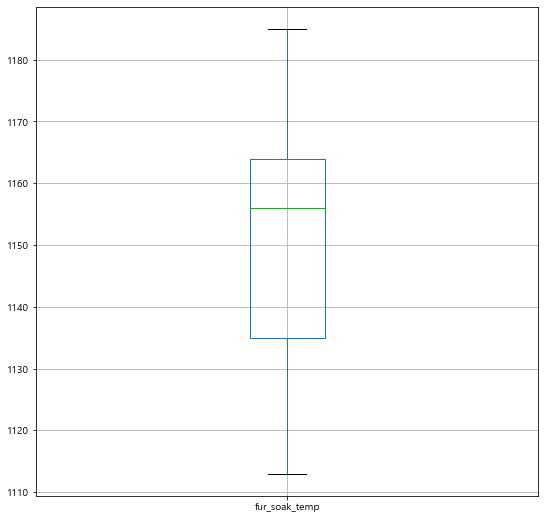

In [33]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['fur_soak_temp'])

<AxesSubplot:>

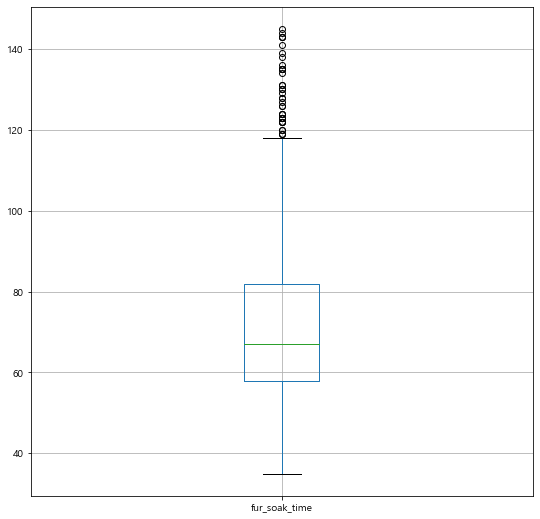

In [34]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['fur_soak_time'])

### 이상치가 존재하지만 연속적으로 분포하고 있기때문에 그대로 사용

<AxesSubplot:>

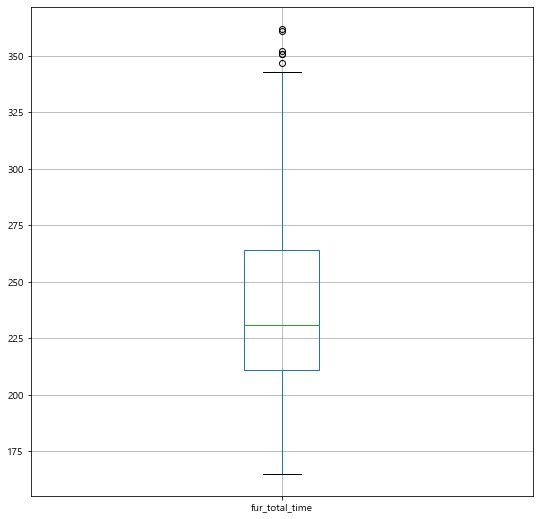

In [35]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['fur_total_time'])

### 이상치가 존재하지만 연속적으로 분포하고 있기때문에 그대로 사용

    total은 예열대 시간 + 가열대시간 + 균열대 시간으로 종속관계라 판단하여 예열대 시간으로 파생변수로 생성함. 

In [36]:
df_raw["pre_heat_time"] = df_raw['fur_total_time'] - df_raw['fur_heat_time'] - df_raw['fur_soak_time']

In [37]:
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,pre_heat_time
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,116,1133,59,259,1133,TMCP(온도제어),934,8,1조,84
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,122,1135,53,238,1135,TMCP(온도제어),937,8,1조,63
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,116,1121,55,258,1121,TMCP(온도제어),889,8,1조,87
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,125,1127,68,266,1127,TMCP(온도제어),885,8,1조,73
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,134,1128,48,246,1128,TMCP(온도제어),873,8,1조,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,55,1151,86,203,1151,CR(제어압연),948,10,4조,62
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,55,1151,86,209,1151,CR(제어압연),948,10,4조,68
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,65,1163,77,227,1163,CR(제어압연),948,10,4조,85
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,65,1163,77,204,1163,CR(제어압연),948,10,4조,62


<AxesSubplot:>

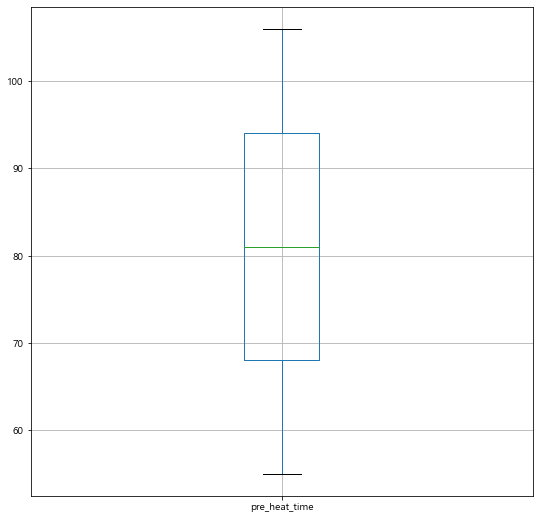

In [38]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['pre_heat_time'])

fur_ex_temp,	rolling_method,	rolling_temp,	descaling_count

<AxesSubplot:>

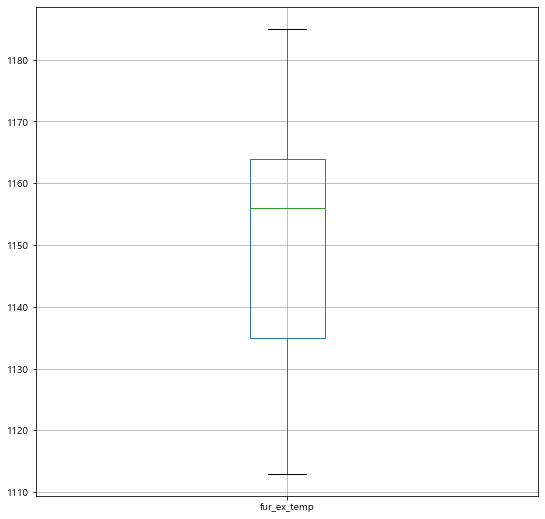

In [39]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['fur_ex_temp'])

<AxesSubplot:>

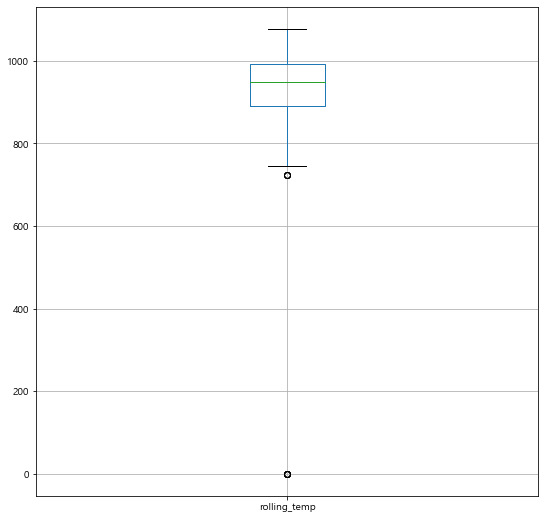

In [40]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['rolling_temp'])

## rolling_temp의 온도가 100이하 삭제

In [41]:
df_raw[df_raw["rolling_temp"]<100]

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,pre_heat_time
53,PLT_1054,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,...,95,1128,80,244,1128,TMCP(온도제어),0,6,1조,69
221,PLT_1222,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,57,1166,67,228,1166,CR(제어압연),0,10,2조,104
222,PLT_1223,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,64,1164,61,188,1164,CR(제어압연),0,10,2조,63
598,PLT_1599,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,...,89,1122,59,229,1122,CR(제어압연),0,6,3조,81
599,PLT_1600,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,...,92,1124,61,210,1124,CR(제어압연),0,6,3조,57
600,PLT_1601,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,...,109,1117,76,260,1117,TMCP(온도제어),0,6,3조,75


In [42]:
df_raw = df_raw[df_raw['rolling_temp']>100]
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,pre_heat_time
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,116,1133,59,259,1133,TMCP(온도제어),934,8,1조,84
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,122,1135,53,238,1135,TMCP(온도제어),937,8,1조,63
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,116,1121,55,258,1121,TMCP(온도제어),889,8,1조,87
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,125,1127,68,266,1127,TMCP(온도제어),885,8,1조,73
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,134,1128,48,246,1128,TMCP(온도제어),873,8,1조,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,55,1151,86,203,1151,CR(제어압연),948,10,4조,62
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,55,1151,86,209,1151,CR(제어압연),948,10,4조,68
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,65,1163,77,227,1163,CR(제어압연),948,10,4조,85
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,65,1163,77,204,1163,CR(제어압연),948,10,4조,62


<AxesSubplot:>

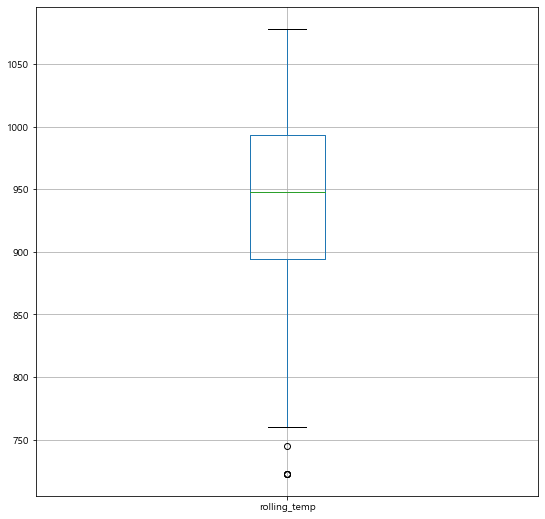

In [43]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['rolling_temp'])

<AxesSubplot:>

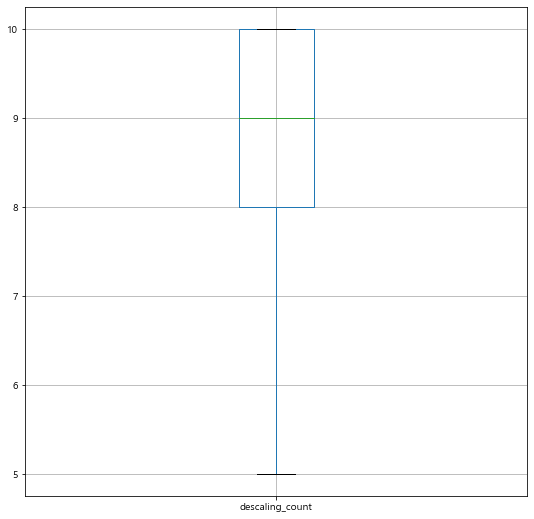

In [44]:
plt.figure(figsize=(9,9))
df_raw.boxplot(column = ['descaling_count'])

- plate_no: 단순한 번호이므로 제외
- rolling_date: 공장이므로 동일한 환경에서 진행된 것이기 때문에 날짜와 상관없으므로 제외
- scale: 목표변수: 불량/양품
- spec_long: 범주
- spec_country: 나라마다 불량율이 다를 수 있으므로 확인
- steel_kind: 범주
- pt_thick  spec_long에 맞게 판단
- pt_width  spec_long에 맞게 판단
- pt_length  계산
- hsb:  범주
- fur_no: 범주
- 'fur_input_row': 범주
- 'fur_heat_temp': IQR
- 'fur_heat_time': IQR
- 'fur_soak_temp': IQR
- 'fur_soak_time': IQR
- 'fur_total_time' :IQR, 파생변수 생성
- 'fur_ex_temp' : IQR
- 'rolling_method' : 범주
- 'rolling_temp' : IQR
- 'descaling_count' : IQR
- 'work_group': 범주

# 히스토그램 - 양품/불량 기준(연속형 데이터)

In [45]:
def fun_plot_hist(data, var):
    plt.hist(data[data["scale"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["scale"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.title(var)
    plt.legend()

# 빈도분석, 카이제곱 검정 (범주형데이터)

In [46]:
def fun_print_crosstab(data, var):
    return pd.crosstab(data["scale"], data[var], margins=True)

## plate 관련

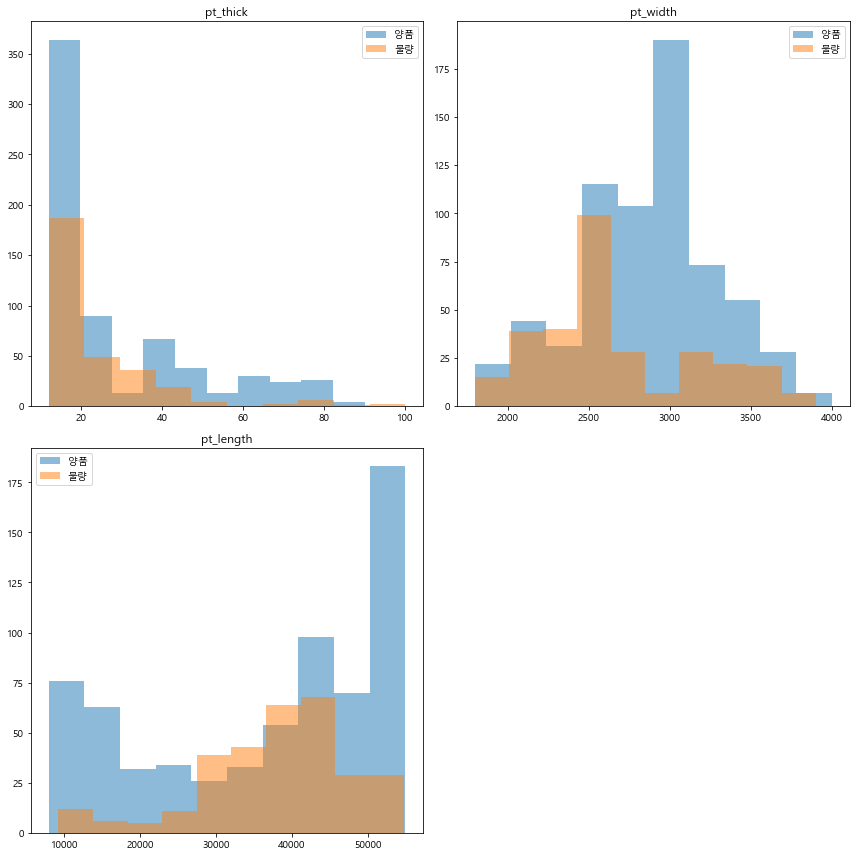

In [47]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "pt_thick")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "pt_width")
plt.subplot(2, 2, 3)
fun_plot_hist(df_raw, "pt_length")

plt.tight_layout()

- scale과 폭,두께,길이의 연관성이 크게 없다고 판단
- 다른 변수와의 연관성을 더 조사해 볼 필요가 있다고 판단

# 가열로 시간, 온도 관련

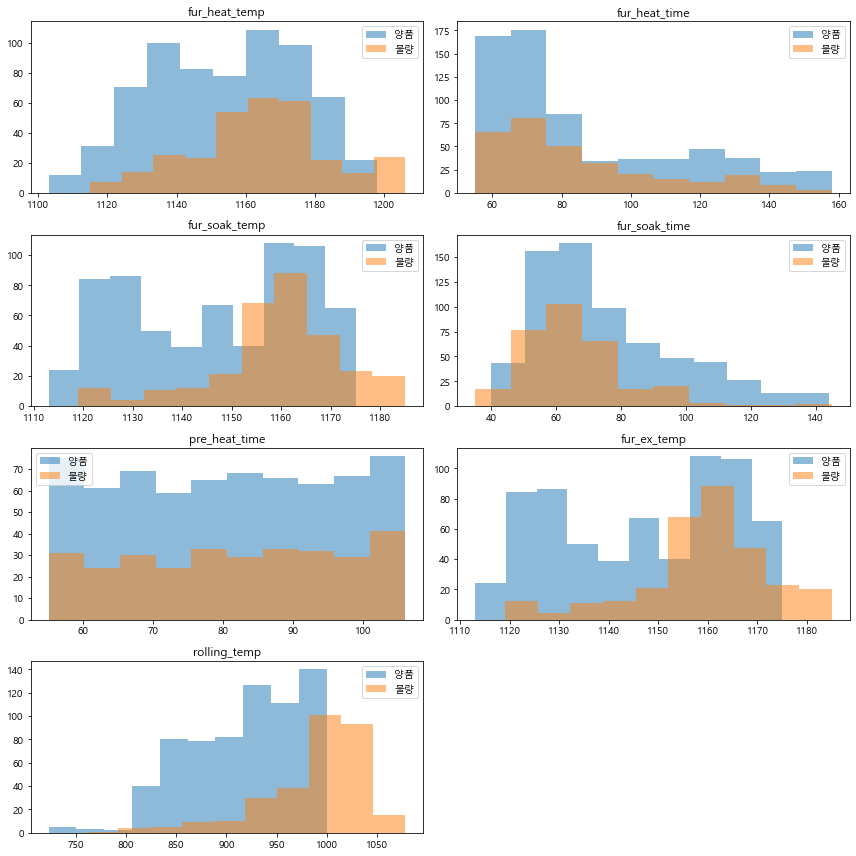

In [48]:
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
fun_plot_hist(df_raw, "fur_heat_temp")
plt.subplot(4, 2, 2)
fun_plot_hist(df_raw, "fur_heat_time")
plt.subplot(4, 2, 3)
fun_plot_hist(df_raw, "fur_soak_temp")
plt.subplot(4, 2, 4)
fun_plot_hist(df_raw, "fur_soak_time")
plt.subplot(4, 2, 5)
fun_plot_hist(df_raw, "pre_heat_time")
plt.subplot(4, 2, 6)
fun_plot_hist(df_raw, "fur_ex_temp")
plt.subplot(4, 2, 7)
fun_plot_hist(df_raw, "rolling_temp")
plt.tight_layout()

- fur_ex_temp와 rolling_temp의 경우 더 온도가 더 높을 수록 불량율이 더 높아지는 것을 확인
- fur_soak_temp와 fur_ex_temp의 모양이 똑같다고 판단하여 fur_soak_temp를 제외
- pre_heat_time의 경우 양품.불량이 고르게 분포하고 있으므로 의미가 없다고 판단하여 제외

# 압연descaling 횟수

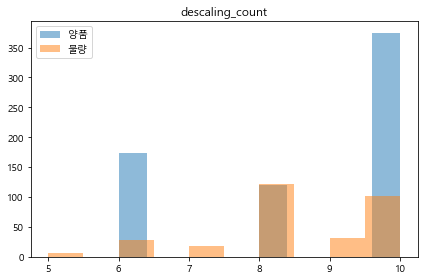

In [32]:
fun_plot_hist(df_raw, "descaling_count")
plt.tight_layout()

- 횟수가 많아질수록 불량율이 적어지지 않으므로 제외

## 가열로 작업순번(범주형)

In [33]:
fun_print_crosstab(df_raw, "fur_input_row")

fur_input_row,1열,2열,All
scale,,,
불량,163,143,306
양품,332,337,669
All,495,480,975


- 해당 범주형 변수는 큰 차이가 없다고 판단하여 제외

## 가열로 호기(범주형)

In [34]:
fun_print_crosstab(df_raw, "fur_no")

fur_no,1호기,2호기,3호기,All
scale,,,,
불량,100,91,115,306
양품,228,225,216,669
All,328,316,331,975


- 가열로 호기마다 차이가 없으므로 제외

## 작업조(범주형)

In [35]:
fun_print_crosstab(df_raw, "work_group")

work_group,1조,2조,3조,4조,All
scale,,,,,
불량,108,82,66,50,306
양품,168,192,149,160,669
All,276,274,215,210,975


- 작업조마다 차이가 없으므로 제외

## 제품규격기준국(범주형)

In [36]:
fun_print_crosstab(df_raw, "spec_country")

spec_country,공통,독일,미국,영국,일본,프랑스,한국,All
scale,,,,,,,,
불량,3,13,42,74,97,29,48,306
양품,33,73,115,167,88,112,81,669
All,36,86,157,241,185,141,129,975


- 일본산일 경우 불량이 양품보다 많음.
- 일본,한국,영국순으로 불량율이 높음

## 제품 규격 (범주형)

In [37]:
fun_print_crosstab(df_raw, "spec_long")

spec_long,A131-DH36TM,A283-C,A516-60,A709-36,AB/A,AB/AH32,AB/B,AB/EH32-TM,AB/EH36-TM,API-2W-50T,...,NV-A36-TM,NV-B,NV-D32-TM,NV-D36-TM,NV-E32-TM,NV-E36-TM,PILAC-BT33,SA283-C,V42JBN3,All
scale,,,,,,,,,,,,,,,,,,,,,
불량,1,5,2,0,12,8,2,0,2,0,...,0,2,0,1,0,0,2,10,1,306
양품,0,1,1,1,38,23,6,2,30,2,...,2,1,3,3,2,5,36,11,3,669
All,1,6,3,1,50,31,8,2,32,2,...,2,3,3,4,2,5,38,21,4,975


- 총 67개 종류중에 제품마다 규격차이가 다르다고 생각이 들고, 표본이 적은 제품도 있다고 판단
- 그러므로 해당컬럼을 제외

## 강종(범주형)

In [38]:
fun_print_crosstab(df_raw, "steel_kind")

steel_kind,C,T,All
scale,,,
불량,286,20,306
양품,449,220,669
All,735,240,975


- steel_kind의 경우 C일 때 불량율이 증가함.
- 강종마다 목표변수에 유의미하다고 생각함.

## hsb(hot scale braker)적용여부 (범주형)

In [39]:
fun_print_crosstab(df_raw, "hsb")

hsb,미적용,적용,All
scale,,,
불량,47,259,306
양품,0,669,669
All,47,928,975


- hsb 미적용일 경우 불량율 100%의 결과가 나옴
- 그러므로 적용일 때만의 데이터를 가지고 모델을 돌릴필요가 있음

## rolling_method, 압연방법 (범주형)

In [16]:
fun_print_crosstab(df_raw, "rolling_method")

rolling_method,CR(제어압연),TMCP(온도제어),All
scale,,,
불량,293,13,306
양품,525,144,669
All,818,157,975


- TMCP인 경우 양품율이 유의미하고 높게 나옴
- 중요한 변수라고 판단

## 탐색적 기법 정리 및 변수 선정

- plate_no: 단순한 번호이므로 제외
- rolling_date: 공장이므로 동일한 환경에서 진행된 것이기 때문에 날짜와 상관없으므로 제외 
- scale: 목표변수: 불량/양품
- spec_long: 표본이 적은 것도 있으므로 제외
- spec_country: 나라마다 불량율이 다름
- steel_kind: 강종의 종류 다르므로 포함
- pt_thick  포함
- pt_width  포함
- pt_length  포함
- hsb: 유의미한 차이가 있으므로 포함
- fur_no: 의미없으므로 제외
- 'fur_input_row': 의미없으므로 제외
- 'fur_heat_temp': 포함
- 'fur_heat_time': 포함
- 'fur_soak_temp': fur_ex_temp와 그래프 유형이 비슷하므로 제외
- 'fur_soak_time': 포함
- 'fur_total_time' : pre_heat_time으로 변환 -> 의미없으므로 제외
- 'fur_ex_temp' : 포함
- 'rolling_method' : 유의미하게 나타났으므로 포함
- 'rolling_temp' : 유의미하게 나타났으므로 포함
- 'descaling_count' : 의미없으므로 제외
- 'work_group': 의미없으므로 제외

- 목표 변수: scale

- 설명변수: spec_country, steel_kind, pt_thick,  pt_width, pt_length, hsb, fur_heat_temp,fur_heat_time,fur_soak_time,fur_ex_temp,rolling_method, rolling_temp
- 총 12개
    

In [49]:
df = df_raw.drop(["plate_no", "rolling_date", "spec_long", "fur_no","fur_input_row", "fur_soak_temp","fur_total_time","pre_heat_time","work_group","descaling_count"], axis=1)

In [43]:
df

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_time,fur_ex_temp,rolling_method,rolling_temp
0,양품,미국,T,32,3700,15100,적용,1144,116,59,1133,TMCP(온도제어),934
1,양품,미국,T,32,3700,15100,적용,1144,122,53,1135,TMCP(온도제어),937
2,양품,영국,T,33,3600,19200,적용,1129,116,55,1121,TMCP(온도제어),889
3,양품,영국,T,33,3600,19200,적용,1152,125,68,1127,TMCP(온도제어),885
4,양품,프랑스,T,38,3100,13300,적용,1140,134,48,1128,TMCP(온도제어),873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,양품,프랑스,C,19,3400,41500,적용,1142,55,86,1151,CR(제어압연),948
996,양품,영국,C,19,3400,41500,적용,1142,55,86,1151,CR(제어압연),948
997,양품,미국,C,17,3400,43700,적용,1169,65,77,1163,CR(제어압연),948
998,양품,영국,C,17,3400,43700,적용,1169,65,77,1163,CR(제어압연),948


In [44]:
## 목표변수 scale을 0,1로 변환
df['scale'] = np.where(df['scale'] == '양품', 0, 1) # 불량:1 양품:0으로 변환
df

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_time,fur_ex_temp,rolling_method,rolling_temp
0,0,미국,T,32,3700,15100,적용,1144,116,59,1133,TMCP(온도제어),934
1,0,미국,T,32,3700,15100,적용,1144,122,53,1135,TMCP(온도제어),937
2,0,영국,T,33,3600,19200,적용,1129,116,55,1121,TMCP(온도제어),889
3,0,영국,T,33,3600,19200,적용,1152,125,68,1127,TMCP(온도제어),885
4,0,프랑스,T,38,3100,13300,적용,1140,134,48,1128,TMCP(온도제어),873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,적용,1142,55,86,1151,CR(제어압연),948
996,0,영국,C,19,3400,41500,적용,1142,55,86,1151,CR(제어압연),948
997,0,미국,C,17,3400,43700,적용,1169,65,77,1163,CR(제어압연),948
998,0,영국,C,17,3400,43700,적용,1169,65,77,1163,CR(제어압연),948


# 가설검정

## 분산분석

제품 두께 구간마다 불량율이 차이가 있을 것이다?

In [17]:
#통계 분석 
import statsmodels.api as sm
import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

### 제품 두께 구간별 불량률의 차이 검정

In [49]:
df_t_test = pd.DataFrame()

In [50]:
df_PT_THICK = pd.DataFrame()
df_t_test["scale"] = df['scale']
df_t_test["pt_thick"] = df['pt_thick']
df_PT_THICK_A = df[df['pt_thick'] < 16]
df_PT_THICK_A = df_PT_THICK_A[["scale", 'pt_thick']]

df_PT_THICK_B = df[(df['pt_thick'] > 16) & (df['pt_thick'] < 20)]
df_PT_THICK_B = df_PT_THICK_B[["scale", 'pt_thick']]

df_PT_THICK_C = df[(df['pt_thick'] > 20) & (df['pt_thick'] < 40)]
df_PT_THICK_C = df_PT_THICK_C[["scale", 'pt_thick']]

df_PT_THICK_D = df[df['pt_thick'] > 40]
df_PT_THICK_D = df_PT_THICK_D[["scale", 'pt_thick']]

# 정규성 검정
statistic, p = stats.shapiro(df_PT_THICK_A['scale'])
statistic, p = stats.shapiro(df_PT_THICK_B['scale'])
statistic, p = stats.shapiro(df_PT_THICK_C['scale'])
statistic, p = stats.shapiro(df_PT_THICK_D['scale'])
print("구간 A 정규성 : statistic = {0}, p-value = {1}".format(statistic, p))
print("구간 B 정규성 : statistic = {0}, p-value = {1}".format(statistic, p))
print("구간 C 정규성 : statistic = {0}, p-value = {1}".format(statistic, p))
print("구간 D 정규성 : statistic = {0}, p-value = {1}".format(statistic, p), end='\n \n')
# 등분산성 검정
var_test = stats.levene(df_PT_THICK_A['scale'], df_PT_THICK_B['scale'], df_PT_THICK_C['scale'])
print(var_test,end='\n \n')
# ANOVA
f_result = stats.f_oneway(df_PT_THICK_A['scale'], df_PT_THICK_B['scale'], df_PT_THICK_C['scale'])

f, p = f_result.statistic.round(3), f_result.pvalue
print("One-Way")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

구간 A 정규성 : statistic = 0.3421415090560913, p-value = 4.009254284331164e-23
구간 B 정규성 : statistic = 0.3421415090560913, p-value = 4.009254284331164e-23
구간 C 정규성 : statistic = 0.3421415090560913, p-value = 4.009254284331164e-23
구간 D 정규성 : statistic = 0.3421415090560913, p-value = 4.009254284331164e-23
 
LeveneResult(statistic=40.53105945229862, pvalue=3.2604823009604536e-17)
 
One-Way
F 통계량: 49.742
p-value: 1.1140555711636313e-20


- 정규성, 등분산성의 검정결과 0.05보다 작으므로 귀무가설이 기각되어 정규성,등분산성을 띄지 않는다.
- 그래도 조건을 만족한다고 가정하여 F분석을 진행해보았다.
- 그럼에도 조건을 만족이 되지 않았기 때문에 그래프 분석의 내용을 바탕으로 모델링을 진행하였다.

# 카이제곱

In [51]:
# 압연방법과 강종 종류에 따른 카이제곱 독립성 검정
df_b = pd.crosstab(df['rolling_method'],df['steel_kind'])

chi, pval, dof, expected = stats.chi2_contingency(df_b)

print("Chisq: {}".format(chi.round(3)))
print("p_value: {}".format(pval.round(3)))
print("Degree of freedom: {}".format(dof))
print("expected value: {}".format(expected.round()))

Chisq: 568.264
p_value: 0.0
Degree of freedom: 1
expected value: [[617. 201.]
 [118.  39.]]


- 실행결과 p값이 0으로, 유의수준 5%에서 압연방법과 강종 종류의 차이가 있다고 말할 수 있다.
- 그러므로, 압연방법과 강종 종류에 연관성이 있다.
- 그렇지만 압연방법과, 강종 종류의 그래프 분석을 통해 둘 다 유의미한 변수라고 판단하여 남기기로 결정

In [52]:
# hsb적용/비적용과 강종 종류에 따른 카이제곱 독립성 검정
df_b = pd.crosstab(df['hsb'],df['steel_kind'])

chi, pval, dof, expected = stats.chi2_contingency(df_b)

print("Chisq: {}".format(chi.round(3)))
print("p_value: {}".format(pval.round(3)))
print("Degree of freedom: {}".format(dof))
print("expected value: {}".format(expected.round()))

Chisq: 0.138
p_value: 0.711
Degree of freedom: 1
expected value: [[ 35.  12.]
 [700. 228.]]


- 실행결과 p값이 0.711이므로, 유의수준 5%에서 hsb과 강종 종류의 차이가 없다고 말할 수 있다.
- 그러므로, hsb과 강종 종류에 연관성이 없다.

In [53]:
# hsb적용/비적용과 압연 방법에 따른 카이제곱 독립성 검정
df_b = pd.crosstab(df['hsb'],df['rolling_method'])

chi, pval, dof, expected = stats.chi2_contingency(df_b)

print("Chisq: {}".format(chi.round(3)))
print("p_value: {}".format(pval.round(3)))
print("Degree of freedom: {}".format(dof))
print("expected value: {}".format(expected.round()))

Chisq: 0.189
p_value: 0.664
Degree of freedom: 1
expected value: [[ 39.   8.]
 [779. 149.]]


- 실행결과 p값이 0.664로, 유의수준 5%에서 hsb과 압연 방법과 차이가 없다고 말할 수 있다.
- 그러므로, hsb와 압연방법에 연관성이 없다.

# 최종 분석 대상 데이터 도출

- HSB데이터를 미적용한 데이터의 경우 모두 불량으로 나왔기에 HSB를 핵심인자로 선정한 후, HSB를 적용한 데이터로만 분석을 진행하도록 하겠다.

- plate_no: 단순한 번호이므로 제외
- rolling_date: 공장이므로 동일한 환경에서 진행된 것이기 때문에 날짜와 상관없으므로 제외
- scale: 목표변수: 불량/양품
- spec_long: 표본이 적은 것도 있으므로 제외
- spec_country: 나라마다 불량율이 다름
- steel_kind: 강종의 종류 다르므로 포함
- pt_thick 포함
- pt_width 포함
- pt_length 포함
- hsb: 유의미한 차이가 있으므로 포함
- fur_no: 의미없으므로 제외
- 'fur_input_row': 의미없으므로 제외
- 'fur_heat_temp': 포함
- 'fur_heat_time': 포함
- 'fur_soak_temp': fur_ex_temp와 그래프 유형이 비슷하므로 제외
- 'fur_soak_time': 포함
- 'fur_total_time' : pre_heat_time으로 변환 -> 의미없으므로 제외
- 'fur_ex_temp' : 포함
- 'rolling_method' : 유의미하게 나타났으므로 포함
- 'rolling_temp' : 유의미하게 나타났으므로 포함
- 'descaling_count' : 의미없으므로 제외
- 'work_group': 의미없으므로 제외

- 목표 변수: scale
- 설명변수: spec_country,  steel_kind,  pt_thick,  pt_width,  pt_length,  fur_heat_temp, fur_heat_time, fur_soak_time, fur_ex_temp,  rolling_method,  rolling_temp
- 총 11개

In [50]:
df = df_raw.drop(["plate_no", "rolling_date", "spec_long", "fur_no","fur_input_row", "fur_soak_temp","fur_total_time","pre_heat_time","work_group","descaling_count"], axis=1)
df = df[df['hsb']=="적용"]
df = df.drop(["hsb"], axis=1)
df['rolling_method'] = np.where(df['rolling_method'] == 'TMCP(온도제어)', 0, 1) # TMCP(온도제어:1,CR(제어압연): 0 
df['steel_kind'] = np.where(df['steel_kind'] == 'C', 0, 1) # T:1 C:0으로 변환
df['scale'] = np.where(df['scale'] == '양품', 0, 1) # 불량:1 양품:0으로 변환
df

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_ex_temp,rolling_method,rolling_temp
0,0,미국,1,32,3700,15100,1144,116,59,1133,0,934
1,0,미국,1,32,3700,15100,1144,122,53,1135,0,937
2,0,영국,1,33,3600,19200,1129,116,55,1121,0,889
3,0,영국,1,33,3600,19200,1152,125,68,1127,0,885
4,0,프랑스,1,38,3100,13300,1140,134,48,1128,0,873
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,0,19,3400,41500,1142,55,86,1151,1,948
996,0,영국,0,19,3400,41500,1142,55,86,1151,1,948
997,0,미국,0,17,3400,43700,1169,65,77,1163,1,948
998,0,영국,0,17,3400,43700,1169,65,77,1163,1,948


In [55]:
df.columns

Index(['scale', 'spec_country', 'steel_kind', 'pt_thick', 'pt_width',
       'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_time',
       'fur_ex_temp', 'rolling_method', 'rolling_temp'],
      dtype='object')

In [56]:
# # 더미화
# df = pd.get_dummies(df)

<AxesSubplot:>

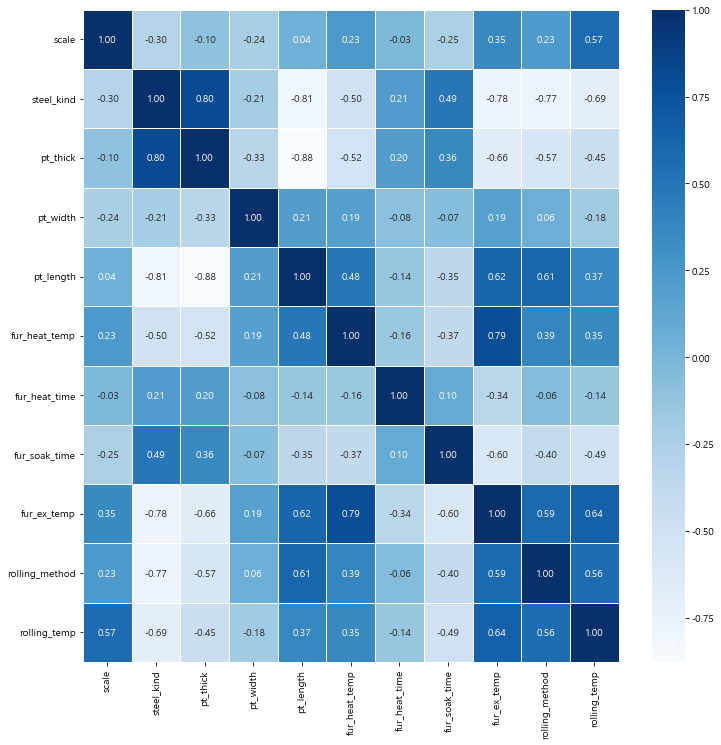

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

# 모델링

## 1. 로지스틱 회귀분석

In [53]:
df = df_raw.drop(["plate_no", "rolling_date", "spec_long", "fur_no","fur_input_row", "fur_total_time","fur_soak_temp","pre_heat_time","work_group","descaling_count"], axis=1)
df = df[df['hsb']=="적용"]
df = df.drop(["hsb"], axis=1)
# df['rolling_method'] = np.where(df['rolling_method'] == 'TMCP(온도제어)', 0, 1) # TMCP(온도제어:1,CR(제어압연): 0 
# df['steel_kind'] = np.where(df['steel_kind'] == 'C', 0, 1) # T:1 C:0으로 변환
df['scale'] = np.where(df['scale'] == '양품', 0, 1) # 불량:1 양품:0으로 변환
df

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_ex_temp,rolling_method,rolling_temp
0,0,미국,T,32,3700,15100,1144,116,59,1133,TMCP(온도제어),934
1,0,미국,T,32,3700,15100,1144,122,53,1135,TMCP(온도제어),937
2,0,영국,T,33,3600,19200,1129,116,55,1121,TMCP(온도제어),889
3,0,영국,T,33,3600,19200,1152,125,68,1127,TMCP(온도제어),885
4,0,프랑스,T,38,3100,13300,1140,134,48,1128,TMCP(온도제어),873
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,1142,55,86,1151,CR(제어압연),948
996,0,영국,C,19,3400,41500,1142,55,86,1151,CR(제어압연),948
997,0,미국,C,17,3400,43700,1169,65,77,1163,CR(제어압연),948
998,0,영국,C,17,3400,43700,1169,65,77,1163,CR(제어압연),948


In [54]:
df_train, df_test = train_test_split(df,
                                     test_size =0.4, random_state=1234)

print("train data size: {}".format(df_train.shape))
print("Test data size: {}".format(df_test.shape))

train data size: (556, 12)
Test data size: (372, 12)


In [55]:
df.columns

Index(['scale', 'spec_country', 'steel_kind', 'pt_thick', 'pt_width',
       'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_time',
       'fur_ex_temp', 'rolling_method', 'rolling_temp'],
      dtype='object')

In [56]:
log_model = Logit.from_formula("""scale ~ C(spec_country) +
C(steel_kind) + pt_thick + pt_width +
pt_length + fur_heat_temp + fur_heat_time  + 
fur_ex_temp + C(rolling_method) + rolling_temp""", df_train)
log_result = log_model.fit()

print(log_result.summary())

         Current function value: 0.321431
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  556
Model:                          Logit   Df Residuals:                      540
Method:                           MLE   Df Model:                           15
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.4470
Time:                        20:52:41   Log-Likelihood:                -178.72
converged:                      False   LL-Null:                       -323.17
Covariance Type:            nonrobust   LLR p-value:                 1.120e-52
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -76.4191   6422.504     -0.012      0.991   -1.27e+04    1.25e+04
C(

- 전체 train 자료수: 556개
- 잔차 자유도: 540
- 모델 자유도: 15
<br><br>
- 설명력: 0.4470 -> 로지스틱 회귀분석의 설명력은 낮음
<br><br>
- 회귀계수 유의성 검정
- pt_width, pt_length, fur_heat_time, fur_ex_temp는 유의하다고 판단

In [57]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print('Train 예측 결과 \n', y_pred_train_class.head(),'\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['scale'],y_pred_train_class)),'\n')
# test 데이터 예측
y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test > 0.5). astype(int)
print('Test 예측 결과 \n', y_pred_train_class.head(),'\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['scale'],y_pred_train_class)),'\n')

Train 예측 결과 
 178    1
832    0
711    0
17     0
956    0
dtype: int32 

Confusion Matrix:
[[387  20]
 [ 36 113]] 

Test 예측 결과 
 178    1
832    0
711    0
17     0
956    0
dtype: int32 

Confusion Matrix:
[[387  20]
 [ 36 113]] 



In [58]:
# 실제 train 데이터와 예측 결과 비교
print('Train 예측/분류 결과')
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_train['scale'], y_pred_train_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['scale'],y_pred_train_class)),'\n')
print(classification_report(df_train['scale'], y_pred_train_class, digits=3))

# 실제 test 데이터와 예측 결과 비교
print('Test 예측/분류 결과')
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_test['scale'], y_pred_test_class)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test['scale'],y_pred_test_class)),'\n')
print(classification_report(df_test['scale'], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.899

Confusion Matrix:
[[387  20]
 [ 36 113]] 

              precision    recall  f1-score   support

           0      0.915     0.951     0.933       407
           1      0.850     0.758     0.801       149

    accuracy                          0.899       556
   macro avg      0.882     0.855     0.867       556
weighted avg      0.897     0.899     0.897       556

Test 예측/분류 결과
Accuracy: 0.874

Confusion Matrix: 
[[248  14]
 [ 33  77]] 

              precision    recall  f1-score   support

           0      0.883     0.947     0.913       262
           1      0.846     0.700     0.766       110

    accuracy                          0.874       372
   macro avg      0.864     0.823     0.840       372
weighted avg      0.872     0.874     0.870       372



- train : 0.899, test:0.874의 정확도를 가진다.
- f1 score의 경우 train일때, 0.933, 0.801로 측정되었다.

# 지금은 스케일링을 하지 않았기 때문에 표준화하여 coef 확인

In [70]:
#30
df_char =df.select_dtypes(include = 'object')
df_numeric =df.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled, columns =df_numeric.columns)

df_scaled= pd.concat([df_numeric_scaled, df_char], axis =1)
df_scaled.head()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_ex_temp,rolling_temp,spec_country,steel_kind,rolling_method
0,-0.62221,0.287397,2.007334,-1.570679,-0.615013,1.112504,-0.628373,-1.016466,-0.101956,미국,T,TMCP(온도제어)
1,-0.62221,0.287397,2.007334,-1.570679,-0.615013,1.338586,-0.918367,-0.901024,-0.055621,미국,T,TMCP(온도제어)
2,-0.62221,0.343099,1.784244,-1.275463,-1.324879,1.112504,-0.821703,-1.709122,-0.796972,영국,T,TMCP(온도제어)
3,-0.62221,0.343099,1.784244,-1.275463,-0.236418,1.451627,-0.193382,-1.362794,-0.858752,영국,T,TMCP(온도제어)
4,-0.62221,0.621612,0.668791,-1.700286,-0.804311,1.790750,-1.160029,-1.305073,-1.044089,프랑스,T,TMCP(온도제어)


In [71]:
# 31 
df_scaled['scale'] = np.where(df_scaled['scale'] >0,1,0)
df_scaled.head()

df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size =0.3, random_state = 1234)

In [72]:
# 32
scaled_log_model = Logit.from_formula("""scale ~ C(spec_country) +
C(steel_kind) + pt_thick + pt_width +
pt_length + fur_heat_temp + fur_heat_time  + 
fur_ex_temp + C(rolling_method) + rolling_temp""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()

print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.299441
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  609
Model:                          Logit   Df Residuals:                      593
Method:                           MLE   Df Model:                           15
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.4916
Time:                        16:49:51   Log-Likelihood:                -182.36
converged:                       True   LL-Null:                       -358.70
Covariance Type:            nonrobust   LLR p-value:                 5.762e-66
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.8109      1.667     -2.886  

<AxesSubplot:>

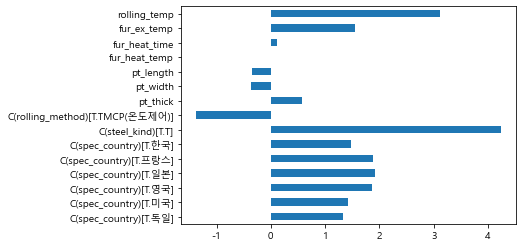

In [73]:
df_log_scaled_coef = pd.DataFrame({'Coef': scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef', legend=False)

- 변수 중요도의 경우 stell_kind(강종의 종류), rolling_temp, 국적,  fur_ex_temp  순으로 중요변수로 측정되었다.
- 강종의 종류가 T일 수록 양품일 가능성이 높아진다.
- 압연방법이 온도제어일수록 불량일 가능성이 높아진다.

# 2. 의사결정나무

In [62]:
df = df_raw.drop(["plate_no", "rolling_date", "spec_long", "fur_no","fur_input_row", "fur_soak_temp","pre_heat_time","work_group","descaling_count"], axis=1)
df = df[df['hsb']=="적용"]
df = df.drop(["hsb"], axis=1)
df['rolling_method'] = np.where(df['rolling_method'] == 'TMCP(온도제어)', 0, 1) # TMCP(온도제어:1,CR(제어압연): 0 
df['steel_kind'] = np.where(df['steel_kind'] == 'C', 0, 1) # T:1 C:0으로 변환
df['scale'] = np.where(df['scale'] == '양품', 0, 1) # 불량:1 양품:0으로 변환
df = pd.get_dummies(df)
df

,scale,steel_kind,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,spec_country_공통,spec_country_독일,spec_country_미국,spec_country_영국,spec_country_일본,spec_country_프랑스,spec_country_한국
0,0,1,32,3700,15100,1144,116,59,259,1133,0,934,0,0,1,0,0,0,0
1,0,1,32,3700,15100,1144,122,53,238,1135,0,937,0,0,1,0,0,0,0
2,0,1,33,3600,19200,1129,116,55,258,1121,0,889,0,0,0,1,0,0,0
3,0,1,33,3600,19200,1152,125,68,266,1127,0,885,0,0,0,1,0,0,0
4,0,1,38,3100,13300,1140,134,48,246,1128,0,873,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,19,3400,41500,1142,55,86,203,1151,1,948,0,0,0,0,0,1,0
996,0,0,19,3400,41500,1142,55,86,209,1151,1,948,0,0,0,1,0,0,0
997,0,0,17,3400,43700,1169,65,77,227,1163,1,948,0,0,1,0,0,0,0
998,0,0,17,3400,43700,1169,65,77,204,1163,1,948,0,0,0,1,0,0,0


In [63]:
# 목표변수, 설명변수 데이터 지정
df_y = df['scale']
df_x = df.drop('scale',axis=1,inplace=False)

# train/test 데이터 분리 6:4 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.4,random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))


train data X size: (556, 18)
train data Y size: (556,)
test data X size: (372, 18)
test data Y size: (372,)


# 튜닝 전 기본모델

In [65]:
# DecisionTreeClassifier
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.925


- train 정확도: 100%
- test 정확도: 92.5%

# max_depth

In [66]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#max_depth:최대깊이 변경:1~10
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.924,0.917
1,2,0.959,0.960
2,3,0.960,0.960
3,4,0.960,0.960
4,5,0.960,0.960
5,6,0.964,0.952
6,7,0.969,0.949
7,8,0.975,0.944
8,9,0.978,0.935
9,10,0.991,0.906


# min_samples_split

In [67]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#min_samples_split: 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,
                                  max_depth = 7, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.969,0.949
1,20,0.969,0.949
2,30,0.968,0.949
3,40,0.968,0.949
4,50,0.968,0.949
5,60,0.968,0.949
6,70,0.966,0.952
7,80,0.960,0.960
8,90,0.960,0.960
9,100,0.960,0.960


# min_samples_leaf

In [68]:
#min_sample_leaf 조정
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#min_samples_leaf: 잎사귀 노드 최소 자료 수: 2~20
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf,
                                  max_depth = 7, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.962,0.952
1,4,0.959,0.960
2,6,0.959,0.960
3,8,0.959,0.960
4,10,0.959,0.960
5,12,0.959,0.960
6,14,0.959,0.960
7,16,0.959,0.960
8,18,0.959,0.960
9,20,0.957,0.946


# gridsearchCV로 파라미터 찾기

In [69]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.959


In [73]:
y_pred = grid_dt.predict(df_train_x)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_dt.score(df_train_x, df_train_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

print(classification_report(df_train_y,y_pred,digits=3))

y_pred = grid_dt.predict(df_test_x)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_dt.score(df_test_x, df_test_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Train 예측/분류 결과
Accuracy: 0.959

Coufusion matrix: 
[[407   0]
 [ 23 126]]
              precision    recall  f1-score   support

           0      0.947     1.000     0.973       407
           1      1.000     0.846     0.916       149

    accuracy                          0.959       556
   macro avg      0.973     0.923     0.944       556
weighted avg      0.961     0.959     0.957       556

Test 예측/분류 결과
Accuracy: 0.960

Coufusion matrix: 
[[262   0]
 [ 15  95]]
              precision    recall  f1-score   support

           0      0.946     1.000     0.972       262
           1      1.000     0.864     0.927       110

    accuracy                          0.960       372
   macro avg      0.973     0.932     0.949       372
weighted avg      0.962     0.960     0.959       372



- 파라미터: 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10
- f1 score의 경우, 0일 경우 0.972, 1일경우 0.927이다.
- test 데이터 기준 정확도는 0.960이다.

In [83]:
# DecisionTreeClassifier
tree_final = DecisionTreeClassifier(random_state=1234, max_depth= 2, min_samples_leaf= 2, min_samples_split= 10)
tree_final.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Accuracy on training set: 0.959
Accuracy on test set: 0.960


In [84]:
#변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance의 테이브ㄹ을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
10,rolling_temp,0.813
8,fur_ex_temp,0.187
0,steel_kind,0.000
16,spec_country_프랑스,0.000
15,spec_country_일본,0.000
14,spec_country_영국,0.000
13,spec_country_미국,0.000
12,spec_country_독일,0.000
11,spec_country_공통,0.000
9,rolling_method,0.000


Text(0, 0.5, '설명변수')

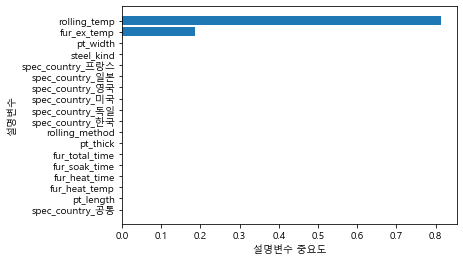

In [85]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

- 중요 설명변수: rolling_temp,fur_ex_temp순으로 중요함

# 랜덤포레스트

In [74]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.4,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (928, 18)
분할 후 설명변수 데이터:Train (556, 18) Test (372, 18)


# 튜닝 전

In [75]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.954


- 정확도는 train 100%, test 95.4%

# gridsearchCV로 튜닝

In [76]:
# 파라미터
para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
param_grid = {"max_depth": para_depth,  "min_samples_leaf": para_leaf}
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=8, min_samples_leaf=5, random_state=1234)

best parameter: 
{'max_depth': 8, 'min_samples_leaf': 5}

best score: 
0.953


In [77]:
y_pred = grid_rf.predict(df_train_x)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_rf.score(df_train_x, df_train_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

print(classification_report(df_train_y,y_pred,digits=3))

y_pred = grid_rf.predict(df_test_x)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_rf.score(df_test_x, df_test_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Train 예측/분류 결과
Accuracy: 0.959

Coufusion matrix: 
[[407   0]
 [ 23 126]]
              precision    recall  f1-score   support

           0      0.947     1.000     0.973       407
           1      1.000     0.846     0.916       149

    accuracy                          0.959       556
   macro avg      0.973     0.923     0.944       556
weighted avg      0.961     0.959     0.957       556

Test 예측/분류 결과
Accuracy: 0.957

Coufusion matrix: 
[[262   0]
 [ 16  94]]
              precision    recall  f1-score   support

           0      0.942     1.000     0.970       262
           1      1.000     0.855     0.922       110

    accuracy                          0.957       372
   macro avg      0.971     0.927     0.946       372
weighted avg      0.959     0.957     0.956       372



- 파라미터: 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators'=100
- f1 score의 경우, 0일 경우 0.970, 1일경우 0.922이다.
- test 데이터 기준 정확도는 0.957이다.

In [90]:
# DecisionTreeClassifier
rf_final = RandomForestClassifier(random_state=1234, n_estimators=100, max_depth= 8, min_samples_leaf= 5)
rf_final.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Accuracy on training set: 0.959
Accuracy on test set: 0.957


In [91]:
#변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

#df_feature_importance의 테이브ㄹ을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
10,rolling_temp,0.504
8,fur_ex_temp,0.110
2,pt_width,0.083
4,fur_heat_temp,0.059
1,pt_thick,0.055
3,pt_length,0.050
6,fur_soak_time,0.031
0,steel_kind,0.031
7,fur_total_time,0.021
5,fur_heat_time,0.021


Text(0, 0.5, '설명변수')

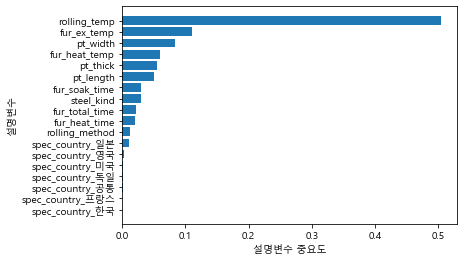

In [92]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

- 중요 설명변수: rolling_temp,fur_ex_temp, pt_width, fur_heat_temp순으로 중요함

# 3. 그래디언트 부스팅

In [78]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.4,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (928, 18)
분할 후 설명변수 데이터:Train (556, 18) Test (372, 18)


# 튜닝 전

In [79]:
rf_uncustomized = GradientBoostingClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.986
Accuracy on test set: 0.954


- 정확도는 train 98.6%, test 95.4%

# gridsearchCV로 튜닝

In [80]:
# 파라미터
para_lr = [lr * 0.1 for lr in range(1,10)]
para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

estimator = GradientBoostingClassifier(n_estimators=100,random_state=1234)
param_grid = {"learning_rate":para_lr,"max_depth": para_depth,  "min_samples_leaf": para_leaf}
grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(max_depth=1, min_samples_leaf=5, random_state=1234)

best parameter: 
{'learning_rate': 0.1, 'max_depth': 1, 'min_samples_leaf': 5}

best score: 
0.959


In [81]:
y_pred = grid_gb.predict(df_train_x)
print('Train 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_gb.score(df_train_x, df_train_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

print(classification_report(df_train_y,y_pred,digits=3))

y_pred = grid_gb.predict(df_test_x)
print('Test 예측/분류 결과')
print("Accuracy: {:.3f}\n".format(grid_gb.score(df_test_x, df_test_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Train 예측/분류 결과
Accuracy: 0.959

Coufusion matrix: 
[[407   0]
 [ 23 126]]
              precision    recall  f1-score   support

           0      0.947     1.000     0.973       407
           1      1.000     0.846     0.916       149

    accuracy                          0.959       556
   macro avg      0.973     0.923     0.944       556
weighted avg      0.961     0.959     0.957       556

Test 예측/분류 결과
Accuracy: 0.960

Coufusion matrix: 
[[262   0]
 [ 15  95]]
              precision    recall  f1-score   support

           0      0.946     1.000     0.972       262
           1      1.000     0.864     0.927       110

    accuracy                          0.960       372
   macro avg      0.973     0.932     0.949       372
weighted avg      0.962     0.960     0.959       372



- 파라미터: max_depth= 1,min_samples_leaf= 5, n_estimators=100, learning_rate= 0.1
- f1 score의 경우, 0일 경우 0.972, 1일경우 0.927이다.
- test 데이터 기준 정확도는 0.960이다.

In [85]:
# GradientBoostingClassifier
gb_final = GradientBoostingClassifier(learning_rate= 0.1, random_state=1234, n_estimators=100, max_depth= 1, min_samples_leaf= 5)
gb_final.fit(df_train_x,df_train_y)
#train모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Accuracy on training set: 0.959
Accuracy on test set: 0.960


In [86]:
#변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
10,rolling_temp,0.818
8,fur_ex_temp,0.174
6,fur_soak_time,0.004
3,pt_length,0.003
7,fur_total_time,0.001
2,pt_width,0.000
4,fur_heat_temp,0.000
5,fur_heat_time,0.000
0,steel_kind,0.000
13,spec_country_미국,0.000


Text(0, 0.5, '설명변수')

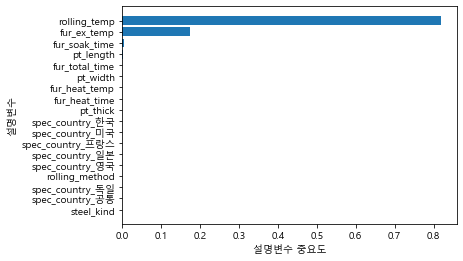

In [100]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

- 중요 설명변수: rolling_temp,fur_ex_temp, fur_soak_time, pt_length순으로 중요함

# 4. SVM

In [87]:
# SVM
from sklearn.svm import SVC

In [88]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,steel_kind,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,spec_country_공통,spec_country_독일,spec_country_미국,spec_country_영국,spec_country_일본,spec_country_프랑스,spec_country_한국
0,1.742063,0.287397,2.007334,-1.570679,-0.615013,1.112504,-0.628373,0.516807,-1.016466,-2.268413,-0.101956,-0.200895,-0.305042,2.295707,-0.565736,-0.492242,-0.414388,-0.39089
1,1.742063,0.287397,2.007334,-1.570679,-0.615013,1.338586,-0.918367,-0.035088,-0.901024,-2.268413,-0.055621,-0.200895,-0.305042,2.295707,-0.565736,-0.492242,-0.414388,-0.39089
2,1.742063,0.343099,1.784244,-1.275463,-1.324879,1.112504,-0.821703,0.490526,-1.709122,-2.268413,-0.796972,-0.200895,-0.305042,-0.435596,1.767610,-0.492242,-0.414388,-0.39089
3,1.742063,0.343099,1.784244,-1.275463,-0.236418,1.451627,-0.193382,0.700772,-1.362794,-2.268413,-0.858752,-0.200895,-0.305042,-0.435596,1.767610,-0.492242,-0.414388,-0.39089
4,1.742063,0.621612,0.668791,-1.700286,-0.804311,1.790750,-1.160029,0.175158,-1.305073,-2.268413,-1.044089,-0.200895,-0.305042,-0.435596,-0.565736,-0.492242,2.413199,-0.39089


In [89]:
# Data Split
random = 1234
df_scaled_train_x, df_scaled_test_x, df_scaled_train_y, df_scaled_test_y = train_test_split(df_scaled, df_y, test_size = 0.4, random_state = 1234)

# gridsearch로 파라미터 튜닝

In [90]:
estimator = SVC(random_state=1234)
para_c = [c*0.1 for c in range(1,21)]
para_gamma = [0.05*gamma for gamma in range(1,15)]
param_gird = {"C" : para_c, "gamma" : para_gamma}

grid_svm = GridSearchCV(estimator, param_gird, scoring="accuracy", n_jobs = -1)
grid_svm.fit(df_scaled_train_x, df_scaled_train_y)
print("best estimator model: \n {0}".format(grid_svm.best_estimator_))
print("\n best parameter: \n {}".format(grid_svm.best_params_))
print("\n best score: \n {}".format(grid_svm.best_score_.round(3)))

best estimator model: 
 SVC(C=1.8, gamma=0.05, random_state=1234)

 best parameter: 
 {'C': 1.8, 'gamma': 0.05}

 best score: 
 0.888


In [91]:
svc_final = SVC(gamma = 0.05, C = 1.8, random_state = random)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
# ACC
print("Accuracy on train set : {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))

Accuracy on train set : 0.914
Accuracy on test set : 0.868


In [95]:
y_pred = grid_svm.predict(df_scaled_train_x)
print('Train 예측/분류 결과')
print("Accuracy:  {:.3f}\n".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

print(classification_report(df_train_y,y_pred,digits=3))

y_pred = grid_svm.predict(df_scaled_test_x)
print('Test 예측/분류 결과')
print("Accuracy:  {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Train 예측/분류 결과
Accuracy:  0.914

Coufusion matrix: 
[[390  17]
 [ 31 118]]
              precision    recall  f1-score   support

           0      0.926     0.958     0.942       407
           1      0.874     0.792     0.831       149

    accuracy                          0.914       556
   macro avg      0.900     0.875     0.887       556
weighted avg      0.912     0.914     0.912       556

Test 예측/분류 결과
Accuracy:  0.868

Coufusion matrix: 
[[247  15]
 [ 34  76]]
              precision    recall  f1-score   support

           0      0.879     0.943     0.910       262
           1      0.835     0.691     0.756       110

    accuracy                          0.868       372
   macro avg      0.857     0.817     0.833       372
weighted avg      0.866     0.868     0.864       372



- 파라미터: gamma = 0.05, C = 1.8
- 정확도는 train: 91.4%, test: 86.8%
- tes 데이터: 1기준 f1 스코어는 75.6%로 다른 모델에 비해 낮음

# 5. KNN

In [97]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

## n_neighbors

In [98]:
train_acc = []
test_acc = []
# 0.01 ~ 100
para_n = [n for n in range(3,30)]

for v_para_n in para_n:
    knn_c = KNeighborsClassifier(n_neighbors = v_para_n)
    knn_c.fit(df_scaled_train_x, df_train_y)
    train_acc.append(knn_c.score(df_scaled_train_x, df_train_y))
    test_acc.append(knn_c.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_acc_n = pd.DataFrame()
df_acc_n["Neighbors"] = para_n
df_acc_n["TrainScore"] = train_acc
df_acc_n["TestScore"] = test_acc

df_acc_n.round(3)

,Neighbors,TrainScore,TestScore
0,3,0.897,0.809
1,4,0.887,0.823
2,5,0.890,0.852
3,6,0.883,0.833
4,7,0.876,0.844
5,8,0.881,0.833
6,9,0.869,0.841
7,10,0.876,0.828
8,11,0.872,0.828
9,12,0.867,0.823


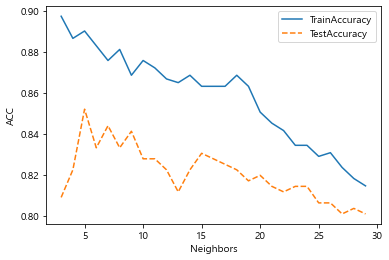

In [99]:
# 그래프
plt.plot(para_n, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_n, test_acc, linestyle = "--", label = "TestAccuracy")
plt.ylabel("ACC")
plt.xlabel("Neighbors")
plt.legend()

In [100]:
train_acc = []
test_acc = []

para_n = [n for n in range(1,31)]*2
para_w = (["uniform"]*30 + (["distance"]*30))

for [v_para_n, v_para_w] in zip(para_n, para_w):
    knn_w = KNeighborsClassifier(n_neighbors = v_para_n, weights = v_para_w)
    knn_w.fit(df_train_x, df_train_y)
    train_acc.append(knn_w.score(df_train_x, df_train_y))
    test_acc.append(knn_w.score(df_test_x, df_test_y))

# 결과 저장
df_acc_w = pd.DataFrame()
df_acc_w["Neighbors"] = para_n
df_acc_w["Weights"] = para_w
df_acc_w["TrainScore"] = train_acc
df_acc_w["TestScore"] = test_acc

df_acc_w.round(3)

,Neighbors,Weights,TrainScore,TestScore
0,1,uniform,1.000,0.793
1,2,uniform,0.894,0.812
2,3,uniform,0.885,0.817
3,4,uniform,0.862,0.812
4,5,uniform,0.854,0.806
5,6,uniform,0.840,0.809
6,7,uniform,0.820,0.793
7,8,uniform,0.817,0.801
8,9,uniform,0.808,0.785
9,10,uniform,0.800,0.790


# weights

<AxesSubplot:xlabel='Neighbors'>

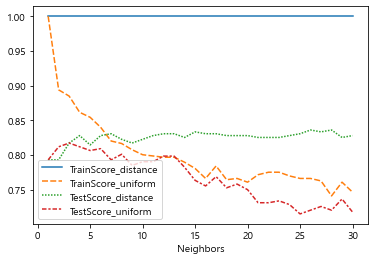

In [101]:
# Data Pivot
df_acc_w_pivot = df_acc_w.pivot(index="Neighbors", columns='Weights', values = ["TrainScore","TestScore"])
df_acc_w_pivot
# 그래프 
level0 = df_acc_w_pivot.columns.get_level_values(0)
level1 = df_acc_w_pivot.columns.get_level_values(1)
df_acc_w_pivot.columns = level0 + "_" + level1
df_acc_w_pivot.head()
sns.lineplot(data = df_acc_w_pivot)

# metric

In [102]:
train_acc = []
test_acc = []

para_n = [n for n in range(1,31)] * 2
para_metric = (["euclidean"]*30 + (["manhattan"]*30))

for [v_para_n, v_metric] in zip(para_n, para_metric):
    knn_w = KNeighborsClassifier(n_neighbors = v_para_n, metric = v_metric, weights = "uniform")
    knn_w.fit(df_train_x, df_train_y)
    train_acc.append(knn_w.score(df_train_x, df_train_y))
    test_acc.append(knn_w.score(df_test_x, df_test_y))

# 결과 저장
df_acc_m = pd.DataFrame()
df_acc_m["Neighbors"] = para_n
df_acc_m["Metric"] = para_metric
df_acc_m["TrainScore"] = train_acc
df_acc_m["TestScore"] = test_acc

df_acc_m.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,euclidean,1.000,0.793
1,2,euclidean,0.894,0.812
2,3,euclidean,0.885,0.817
3,4,euclidean,0.862,0.812
4,5,euclidean,0.854,0.806
5,6,euclidean,0.840,0.809
6,7,euclidean,0.820,0.793
7,8,euclidean,0.817,0.801
8,9,euclidean,0.808,0.785
9,10,euclidean,0.800,0.790


<AxesSubplot:xlabel='Neighbors'>

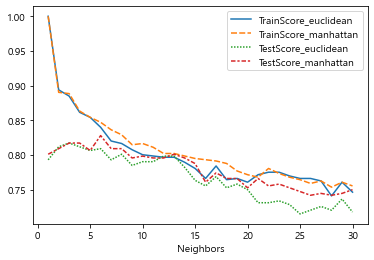

In [105]:
# Data Pivot
df_acc_m_pivot = df_acc_m.pivot(index="Neighbors", columns="Metric", values = ["TrainScore","TestScore"])
level0 = df_acc_m_pivot.columns.get_level_values(0)
level1 = df_acc_m_pivot.columns.get_level_values(1)
df_acc_m_pivot.columns = level0 + "_" + level1
df_acc_m_pivot.head()
sns.lineplot(data = df_acc_m_pivot)

In [106]:
# knn_final = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", weights = "distance")
knn_final = KNeighborsClassifier(n_neighbors = 5, metric = "manhattan", weights = "distance")
knn_final.fit(df_scaled_train_x, df_train_y)
y_pred = knn_final.predict(df_scaled_test_x)
# ACC
print("Accuracy on train set : {:.3f}".format(knn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix : \n{}".format(confusion_matrix(df_scaled_test_y, y_pred)))
# 목표변수의 빈도 불균형 : f1 score
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on train set : 1.000
Accuracy on test set : 0.847
Confusion matrix : 
[[244  18]
 [ 39  71]]
              precision    recall  f1-score   support

           0      0.862     0.931     0.895       262
           1      0.798     0.645     0.714       110

    accuracy                          0.847       372
   macro avg      0.830     0.788     0.804       372
weighted avg      0.843     0.847     0.842       372



In [107]:
y_pred = knn_final.predict(df_scaled_train_x)
print('Train 예측/분류 결과')
print("Accuracy:  {:.3f}\n".format(knn_final.score(df_scaled_train_x, df_train_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

print(classification_report(df_train_y,y_pred,digits=3))

y_pred = knn_final.predict(df_scaled_test_x)
print('Test 예측/분류 결과')
print("Accuracy:  {:.3f}\n".format(knn_final.score(df_scaled_test_x, df_test_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Train 예측/분류 결과
Accuracy:  1.000

Coufusion matrix: 
[[407   0]
 [  0 149]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       407
           1      1.000     1.000     1.000       149

    accuracy                          1.000       556
   macro avg      1.000     1.000     1.000       556
weighted avg      1.000     1.000     1.000       556

Test 예측/분류 결과
Accuracy:  0.847

Coufusion matrix: 
[[244  18]
 [ 39  71]]
              precision    recall  f1-score   support

           0      0.862     0.931     0.895       262
           1      0.798     0.645     0.714       110

    accuracy                          0.847       372
   macro avg      0.830     0.788     0.804       372
weighted avg      0.843     0.847     0.842       372



- 파라미터: n_neighbors = 5, metric = "manhattan", weights = "distance"
- 정확도는 train: 100%, test: 84.7%
- 1기준 f1 스코어는 71.4%로 다른 모델에 비해 낮음

## 6. 인공신경망(NN)

In [108]:
# NN
from sklearn.neural_network import MLPClassifier

In [109]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state=random)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(556, 18)
test data X size:(372, 18)


In [110]:
train_accuracy = []
test_accuracy = []
# para_hidden = [5 * hidden for hidden in range(1, 21)]
para_hidden = [hidden for hidden in range(20, 50)]
print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden),random_state=random)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.919,0.876
1,21,0.914,0.868
2,22,0.917,0.871
3,23,0.935,0.882
4,24,0.941,0.884
5,25,0.919,0.876
6,26,0.930,0.879
7,27,0.942,0.871
8,28,0.942,0.879
9,29,0.926,0.863


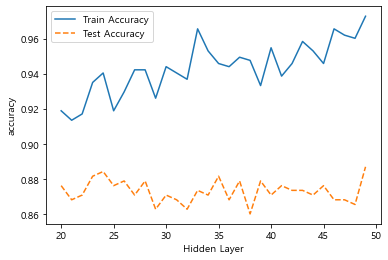

In [111]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()
plt.show()

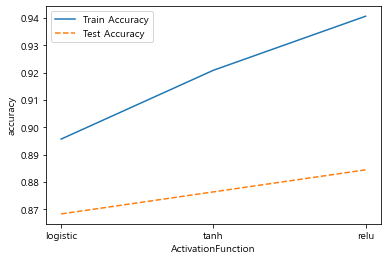

In [112]:
train_accuracy = []
test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation=v_function, hidden_layer_sizes=(24, 24),random_state=random)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

df_accuracy_function.round(3)

plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('ActivationFunction')
plt.legend()
plt.show()

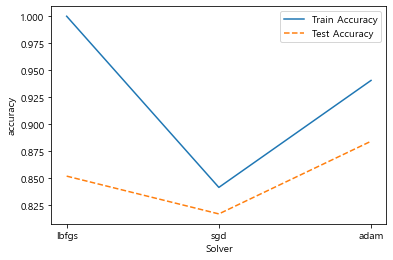

In [113]:
train_accuracy = []
test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver, activation='relu', hidden_layer_sizes=(24, 24),random_state=random)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

df_accuracy_solver.round(3)

plt.plot(para_solver, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()
plt.show()

[20, 40, 60, 80, 100, 120, 140, 160, 180]


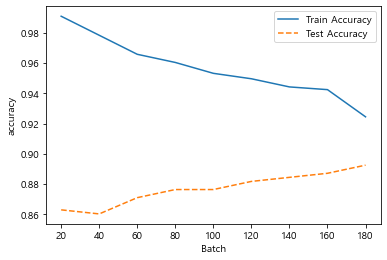

In [114]:
train_accuracy = []
test_accuracy = []
para_batch = [20 * batch for batch in range(1, 10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch, solver='adam', activation='relu', hidden_layer_sizes=(24, 24), random_state=random)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['Mini Batch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

df_accuracy_batch.round(3)

plt.plot(para_batch, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Batch')
plt.legend()
plt.show()

In [116]:
y_pred = nn_final.predict(df_scaled_train_x)
print('Train 예측/분류 결과')
print("Accuracy:  {:.3f}\n".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))

print(classification_report(df_train_y,y_pred,digits=3))

y_pred = nn_final.predict(df_scaled_test_x)
print('Test 예측/분류 결과')
print("Accuracy:  {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
print("Coufusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Train 예측/분류 결과
Accuracy:  0.964

Coufusion matrix: 
[[402   5]
 [ 15 134]]
              precision    recall  f1-score   support

           0      0.964     0.988     0.976       407
           1      0.964     0.899     0.931       149

    accuracy                          0.964       556
   macro avg      0.964     0.944     0.953       556
weighted avg      0.964     0.964     0.964       556

Test 예측/분류 결과
Accuracy:  0.863

Coufusion matrix: 
[[240  22]
 [ 29  81]]
              precision    recall  f1-score   support

           0      0.892     0.916     0.904       262
           1      0.786     0.736     0.761       110

    accuracy                          0.863       372
   macro avg      0.839     0.826     0.832       372
weighted avg      0.861     0.863     0.862       372



- batch_size=50, solver='adam', activation='relu', hidden_layer_sizes=(24, 24)
- 정확도는 train: 96.4%, test: 86.3%
- 1기준 f1 스코어는 76.1%로 다른 모델에 비해 낮음

# 결론

# 결과: 의사결정나무와 그래디언트 부스팅의 성능지표가 거의 동일하게 출력되었다.
# 최종모델 선정: 그래디언트 부스팅

### 변수중요도
- 의사결정나무는 변수중요도가 변수 2개에 집중되어 있음
- 그래디언트 부스팅도 거의 변수 2개에 집중되어 있으나 다른 변수에 조금씩 중요도가 분산되어 있음.

-> 그렇기 때문에 그래디언트 부스팅으로 최종모델을 정하였다.

- 그래디언트 부스팅
- 파라미터: max_depth= 1,min_samples_leaf= 5, n_estimators=100, learning_rate= 0.1
- f1 score의 경우, 0일 경우 0.972, 1일경우 0.927이다.
- test 데이터 기준 정확도는 0.960이다.

- Accuracy on training set: 0.959
- Accuracy on test set: 0.960